In [10]:
# Import necessary libraries and modules
import pandas as pd

import numpy as np
import sys
import os

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

sys.path.append(project_root)

from src import data_processing, model_training_ARIMA, visualization

# Load data
data_path = r'C:\Users\astle\SENG8080-23F-Sec-1\Project Team 3\traffic_prediction_project\datasets\traffic_incident_data.csv'
data = data_processing.load_traffic_data(data_path)
#print(data['INCIDENT_DATE'])
#print(data['Year'].head)
road_data_path = r'C:\Users\astle\SENG8080-23F-Sec-1\Project Team 3\traffic_prediction_project\datasets\Traffic_Collisions.csv'
road_data = data_processing.load_traffic_volume_data(road_data_path)
# print(road_data.head())

# Aggregation (e.g., monthly averages)
#agg_incident = data.groupby(['Year']).agg({'severityScore': 'mean', 'roadClosed': 'sum'}).reset_index()
# agg_incident['roadClosed'] = (agg_incident['roadClosed'] > 0)  # Convert the sum to a boolean (True if any closures, False otherwise)

# agg_volume = road_data.groupby(['Year']).agg({'AADT': 'mean'}).reset_index()

# # Left merge to retain all years from the volume dataset
# merged_df = pd.merge(road_data, data, on='Year',how='left')

merged_df = pd.merge(data, road_data, left_on='INCIDENT_DATE', right_on='ACCIDENTDATE', how='inner')

# Destination directory for CSV export
export_directory = "Project Team 3/traffic_prediction_project/datasets"

# Create the directory if it doesn't exist
if not os.path.exists(export_directory):
    os.makedirs(export_directory)

            # Destination file for CSV export
csv_file = os.path.join(export_directory, "merged_data.csv")
merged_df.to_csv(csv_file, index=False)
# Display the merged data
print(merged_df.head())

# # Merge datasets
# merged_df = pd.merge(data, road_data, how='outer', on='Year')
# merged_df['severityScore'] = merged_df.groupby('Year')['severityScore'].transform('mean')
# merged_df['roadClosed'] = merged_df.groupby('Year')['roadClosed'].transform('sum')
# merged_df = merged_df.fillna({
#     'severityScore': merged_df['severityScore'].mean(),
#     'roadClosed': merged_df['roadClosed'].median(),
#     'AADT': merged_df['AADT'].mean()
# })



# print(merged_df[['AADT','Year']].head())
# # Train the model

# predictions = model_training_ARIMA.train_arima_model(merged_df)

# print(predictions)

# Make predictions

#predictions = model.forecast(steps=len(test_data))

                        _id  \
0  65669c41a504fecc00e37508   
1  65669c41a504fecc00e37508   
2  65669c41a504fecc00e37508   
3  65669c6e545e2847048c5d1f   
4  65669c6e545e2847048c5d1f   

                                               point  \
0  {'type': 'Point', 'coordinates': [43.325249, -...   
1  {'type': 'Point', 'coordinates': [43.325249, -...   
2  {'type': 'Point', 'coordinates': [43.325249, -...   
3  {'type': 'Point', 'coordinates': [43.325249, -...   
4  {'type': 'Point', 'coordinates': [43.325249, -...   

                                         description               start  \
0  Oxford Waterloo Rd is closed from Tye Rd to Ri... 2022-02-08 17:45:30   
1  Oxford Waterloo Rd is closed from Tye Rd to Ri... 2022-02-08 17:45:30   
2  Oxford Waterloo Rd is closed from Tye Rd to Ri... 2022-02-08 17:45:30   
3  Oxford Waterloo Rd is closed from Tye Rd to Ri... 2022-02-08 17:45:30   
4  Oxford Waterloo Rd is closed from Tye Rd to Ri... 2022-02-08 17:45:30   

                   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Assuming merged_df is your preprocessed and cleaned DataFrame
# Replace 'features' and 'target' with the actual column names
merged_df.dropna()
# Define features and target
features = ['severityScore','severity']  # Adjust based on your data
target = 'AADT'  # Adjust based on your data

# Extract features and target variable
X = merged_df[features]
y = merged_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)
print(predictions)
# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# You can now use the trained model to make predictions on new data
# new_data_predictions = model.predict(new_data_features)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import seaborn as sns


# Features
features = [
    'X', 'Y',
    
    'COLLISIONTYPE', 'IMPACTLOCATION',
    'INITIALIMPACTTYPE', 'INITIALDIRECTIONOFTRAVELONE', 'INITIALDIRECTIONOFTRAVELTWO',
    'INTTRAFFICCONTROL', 'TRAFFICCONTROL', 'TRAFFICCONTROLCONDITION',
    'ENVIRONMENTCONDITION1', 'ENVIRONMENTCONDITION2',
    
    'CYCLISTINVOLVED', 'MOTORCYCLISTINVOLVED', 'LIGHT'
]

# Target variable
target = 'severity'  # Assuming 'severity' is the target variable

# Select features and target variable
data = merged_df[features + [target]].copy()

# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['COLLISIONTYPE', 'IMPACTLOCATION', 'INITIALIMPACTTYPE', 'INITIALDIRECTIONOFTRAVELONE', 'INITIALDIRECTIONOFTRAVELTWO', 'INTTRAFFICCONTROL', 'TRAFFICCONTROL', 'TRAFFICCONTROLCONDITION', 'ENVIRONMENTCONDITION1', 'ENVIRONMENTCONDITION2', 'LIGHT'], drop_first=True)

# Handle missing values if any
#data.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
# Make predictions on the entire dataset
merged_df['Predicted_Severity'] = model.predict(data.drop(target, axis=1))


print(merged_df['Predicted_Severity'])

# Destination directory for CSV export
export_directory = "Project Team 3/traffic_prediction_project/datasets"

# Create the directory if it doesn't exist
if not os.path.exists(export_directory):
    os.makedirs(export_directory)

            # Destination file for CSV export
csv_file = os.path.join(export_directory, "merged_data_predicted.csv")
merged_df.to_csv(csv_file, index=False)



0      2.96
1      3.00
2      2.96
3      2.96
4      3.00
       ... 
301    1.00
302    1.00
303    1.00
304    1.00
305    1.00
Name: Predicted_Severity, Length: 306, dtype: float64


[1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 2.96188525 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 2.96188525 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911 1.07621911
 1.07621911 1.07621911]
Mean Squared Error: 0.18
R^2 Score: 0.38



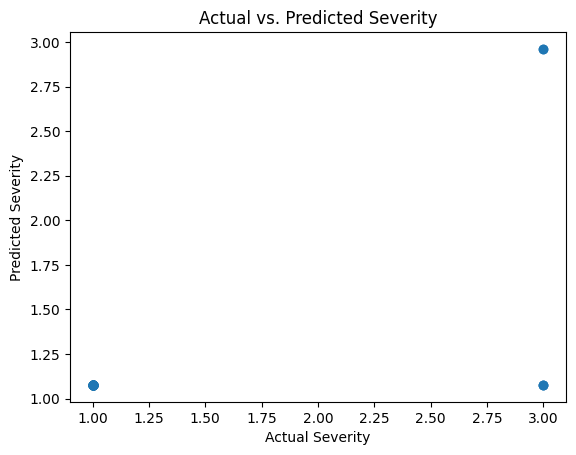

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
 
# Assuming df_incident is the DataFrame for traffic incident data and df_collision is for traffic collision data
 
# Merge the two DataFrames on a common key (e.g., ACCIDENTNUM)
 
 
# Features
features = [
    'X','Y',
    'COLLISIONTYPE', 'TRAFFICCONTROL', 'TRAFFICCONTROLCONDITION'
]
 
# Target variable
target = 'severity'  # Assuming 'severity' is the target variable
 
# Select features and target variable
data = merged_df[features + [target]].copy()
 
# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=[ 'TRAFFICCONTROL', 'TRAFFICCONTROLCONDITION'], drop_first=True)
 
# Handle missing values if any
#data.dropna(inplace=True)
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=42)
 
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
 
# Make predictions on the test set
y_pred = model.predict(X_test)
 
print(y_pred)
 
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}\n")
 
# Visualization - Compare Predictions vs. Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs. Predicted Severity")
plt.show()